In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
plt.rcParams['font.family'] = 'DejaVu Sans'
import warnings
import math
import os
from tqdm.notebook import tqdm

# Suppress glyph warnings
warnings.filterwarnings("ignore", message="Glyph.*missing from current font")

In [2]:
import shutil

# Specify the path of the directory to delete
directory_path = 'plots'

try:
    shutil.rmtree(directory_path)
    print(f"Successfully removed the directory and its contents: {directory_path}")
except Exception as e:
    print(f"Error: {e}")


Error: [WinError 3] The system cannot find the path specified: 'plots'


In [3]:
df = pd.read_csv("train.csv")
df.head(10)

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...
5,Online Financial Fraud,UPI Related Frauds,FRAUD \t UPI PAYTM \r\nBANK \tPunjab National ...
6,Online Financial Fraud,Fraud CallVishing,Sir I am Prabhat Singh jat An app on playstor...
7,Online Financial Fraud,Internet Banking Related Fraud,FINANCIAL FRAUD RS
8,RapeGang Rape RGRSexually Abusive Content,NaN,I got the message on Whatsapp to my number The...
9,Any Other Cyber Crime,Other,Details entered in pdf file Person posing as A...


In [4]:
(df.isna().sum() / len(df))*100

category              0.000000
sub_category          7.035203
crimeaditionalinfo    0.022415
dtype: float64

In [5]:
target_columns = ['category' , 'sub_category']

In [6]:
# Create the plots directory if it does not exist
os.makedirs('plots', exist_ok=True)

# Create or open the README.md file for appending
with open('plots/README.md', 'a+') as readme_file: 
    # Write the header and overview section only if the file is empty
    if readme_file.tell() == 0:  # Check if file is empty
        readme_file.write("# Data Analysis Project\n\n")
        readme_file.write("## Overview\n")
        readme_file.write("This project analyzes various categories and subcategories of cyber crimes. "
                          "The dataset includes multiple columns, some of which are categorical in nature. "
                          "To facilitate analysis and visualization, categorical labels have been converted to integer representations based on their frequency of occurrence.\n\n")
        
        readme_file.write("## Label Mapping Strategy\n\n")
        readme_file.write("The following strategy was used to map categorical labels to integers:\n")
        readme_file.write("1. **Counting Occurrences**: For each target column, the occurrences of each unique label were counted.\n")
        readme_file.write("2. **Mapping Labels to Integers**: A mapping was created where the most frequent label is assigned `0`, the second most frequent label is assigned `1`, and so forth.\n")
        readme_file.write("3. **Replacing Original Labels**: The original labels in the DataFrame were replaced with their corresponding integer values using the mapping.\n\n")

    readme_file.write("### Target Columns Mapped\n\n")

    # Loop through target columns to create mappings
    for x in target_columns:
        # Step 1: Count occurrences of each unique label
        value_counts = df[x].value_counts()

        # Step 2: Create a mapping of labels to integers based on their frequency
        label_mapping = {label: index for index, (label, count) in enumerate(value_counts.items())}

        # Write the mapping to the README file
        readme_file.write(f"#### Mapping for '{x}'\n")
        readme_file.write("```python\n")
        readme_file.write(f"{label_mapping}\n")
        readme_file.write("```\n\n")

        # Step 3: Replace original labels with integers using the mapping
        df[x] = df[x].replace(label_mapping)

# Show the final DataFrame (optional)
print(df.head())


   category  sub_category                                 crimeaditionalinfo
0         1           5.0  I had continue received random calls and abusi...
1         0           4.0  The above fraudster is continuously messaging ...
2         9          21.0  He is acting like a police and demanding for m...
3         1          11.0  In apna Job I have applied for job interview f...
4         0           4.0  I received a call from lady stating that she w...


C:\Users\ashvi\AppData\Local\Temp\ipykernel_11208\500535216.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[x] = df[x].replace(label_mapping)
C:\Users\ashvi\AppData\Local\Temp\ipykernel_11208\500535216.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[x] = df[x].replace(label_mapping)


In [7]:
# 1. Basic Information about Data
print("Data Shape:", df.shape)
print("Data Columns:", df.columns)
print("Data Types:", df.dtypes)
print("First Few Rows:", df.head())


Data Shape: (93686, 3)
Data Columns: Index(['category', 'sub_category', 'crimeaditionalinfo'], dtype='object')
Data Types: category                int64
sub_category          float64
crimeaditionalinfo     object
dtype: object
First Few Rows:    category  sub_category                                 crimeaditionalinfo
0         1           5.0  I had continue received random calls and abusi...
1         0           4.0  The above fraudster is continuously messaging ...
2         9          21.0  He is acting like a police and demanding for m...
3         1          11.0  In apna Job I have applied for job interview f...
4         0           4.0  I received a call from lady stating that she w...


Missing Values:
 sub_category          6591
crimeaditionalinfo      21
dtype: int64


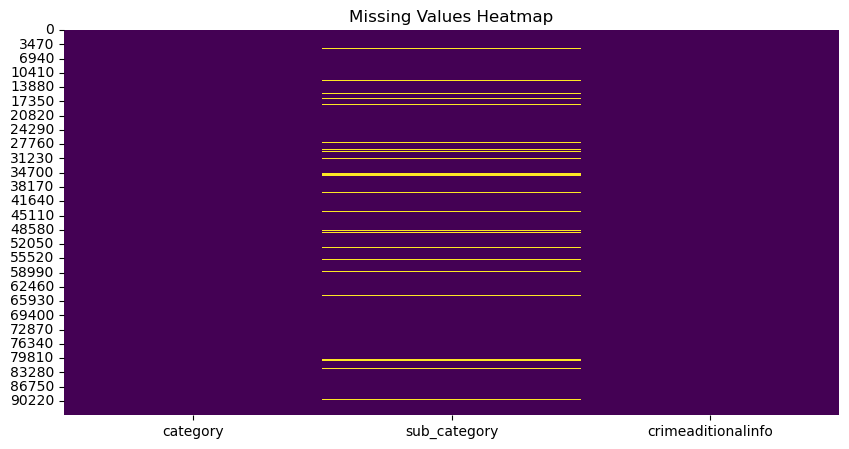

In [8]:
# 2. Missing Values Analysis
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

# Visualize missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [9]:
df= df.dropna()

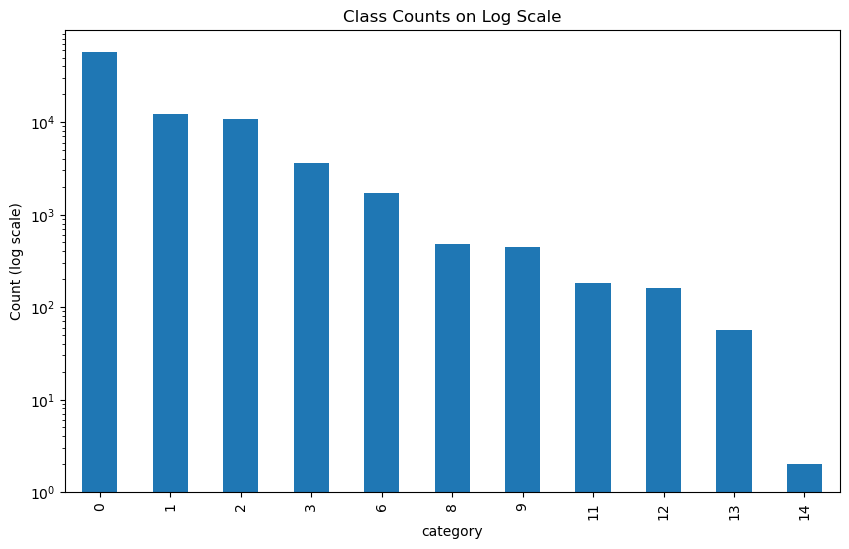

In [10]:
# 2.5 Class Count Analysis
output_dir = "plots/Class Counts"
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist

for x in target_columns : 
    # Create the plot
    plt.figure(figsize=(10, 6))
    class_counts = df[x].value_counts()
    class_counts.plot(kind='bar', log=True)
    plt.xlabel(f"{x}")
    plt.ylabel('Count (log scale)')
    plt.title('Class Counts on Log Scale')

    # Save the plot
    file_path = os.path.join(output_dir, f"{x}_log_scale.png")
    plt.savefig(file_path, bbox_inches='tight')
# Optionally, close the plot to free up memory
plt.close()

In [11]:
# 3. Summary Statistics
print("Summary Statistics:\n", df.describe())

# For categorical variables
print("Categorical Value Counts:\n")
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts())


Summary Statistics:
            category  sub_category
count  87074.000000  87074.000000
mean       0.775191      3.856306
std        1.586005      5.403490
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      2.000000
75%        1.000000      5.000000
max       14.000000     34.000000
Categorical Value Counts:

crimeaditionalinfo
Financial Fraud                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       234
Fraudulent transaction   

In [12]:
def sanitize_name(name):
    """Replace invalid characters in a string for file naming."""
    return name.replace("/", "_").replace("\\", "_").replace(":", "_").replace(" ", "_").replace("?", "_").replace("<", "_").replace(">", "_").replace("|", "_")

# Create a new DataFrame with sanitized column names
sanitized_columns = [sanitize_name(col) for col in df.columns]
df.columns = sanitized_columns

In [13]:
# 4. Numerical Distribution
# Define the directory to save plots
output_dir = "plots/numerical_distributions"
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist

# Total number of numerical columns to plot
numerical_columns = df.select_dtypes(include=np.number).columns
num_plots = len(numerical_columns)

# Choose the number of columns for the subplot grid (e.g., 3 columns)
num_columns = 3

# Calculate the number of rows needed (using ceiling to ensure all plots fit)
num_rows = math.ceil(num_plots / num_columns)

# Loop through each numerical column to create and save plots
for i, col in enumerate(numerical_columns, 1):
    plt.figure(figsize=(5, 4))  # Single figure per plot

    # Check if the column is binary
    unique_values = df[col].dropna().unique()
    if len(unique_values) == 2:
        # Binary variable - use countplot
        ax = sns.countplot(x=col, data=df)
        plt.title(f'Count of {col}')

        # Add count annotations above the bars
        for p in ax.patches:  # Loop through each bar
            ax.annotate(f'{int(p.get_height())}',  # Get height of the bar (count)
                        (p.get_x() + p.get_width() / 2., p.get_height()),  # Positioning the text
                        ha='center', va='bottom', fontsize=10)  # Center alignment and adjust font size

    else:
        # Non-binary variable - use histogram with KDE
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Distribution of {col}')

    # Save the individual plot
    filename = f"{col}_distribution.png"  # Using sanitized names if applicable
    file_path = os.path.join(output_dir, filename)
    plt.savefig(file_path, bbox_inches='tight')

    plt.close()  # Close the plot after saving to free up memory



In [14]:
# 5. Detecting Outliers (Box Plot) with variable scales
# Define the directory to save plots
output_dir = "plots/boxplots"
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist

# Total number of numerical columns to plot
num_plots = len(df.select_dtypes(include=np.number).columns)

# Choose the number of columns for the subplot grid (e.g., 3 columns)
num_columns = 3

# Calculate the number of rows needed
num_rows = math.ceil(num_plots / num_columns)

# Loop through each numerical column to create and save plots
for i, col in enumerate(df.select_dtypes(include=np.number).columns, 1):
    plt.figure(figsize=(5, 4))  # Initialize a new figure for each plot

    # Create box plot with independent linear scale
    sns.boxplot(data=df, y=col)
    plt.yscale('linear')  # Sets a linear scale
    plt.title(f'Distribution of {col}')

    # Save the individual plot
    filename = f"{col}_boxplot.png"
    file_path = os.path.join(output_dir, filename)
    plt.savefig(file_path, bbox_inches='tight')

    plt.close()  # Close the plot after saving to free up memory



In [15]:
# 6. Correlation Matrix
# Define the directory to save the plot
output_dir = "plots/heatmaps"
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist

# Select only numerical columns
numerical_df = df.select_dtypes(include='number')

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = numerical_df.corr()  # Compute correlation matrix for numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Features")

# Save the heatmap plot
file_path = os.path.join(output_dir, "correlation_matrix_heatmap.png")
plt.savefig(file_path, bbox_inches='tight')

plt.close()  # Close the plot to free up memory
